In [2]:
from sqlalchemy import *
from sqlalchemy.sql import *

import pandas
from matplotlib import pyplot as plt

engine = create_engine('sqlite:///Data/Chinook_Sqlite.sqlite')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()

Album=Table("Album", metadata, autoload=True, autoload_with="engine")
MediaType=Table("MediaType", metadata, autoload=True, autoload_with="engine")
Artist=Table("Artist", metadata, autoload=True, autoload_with="engine")
Customer=Table("Customer", metadata, autoload=True, autoload_with="engine")
Employee=Table("Employee", metadata, autoload=True, autoload_with="engine")
Track=Table("Track", metadata, autoload=True, autoload_with="engine")
Genre=Table("Genre", metadata, autoload=True, autoload_with="engine")
Invoice=Table("Invoice", metadata, autoload=True, autoload_with="engine")
InvoiceLine=Table("InvoiceLine", metadata, autoload=True, autoload_with="engine")
Playlist=Table("Playlist", metadata, autoload=True, autoload_with="engine")
PlaylistTrack=Table("PlaylistTrack", metadata, autoload=True, autoload_with="engine")
A = Album.alias('A')
M = MediaType.alias('M')
Ar = Artist.alias('Ar')
C = Customer.alias('C')
E = Employee.alias('E')
T = Track.alias('T')
G = Genre.alias('G')
I = Invoice.alias('I')
IL = InvoiceLine.alias('IL')
P = Playlist.alias('P')
PT = PlaylistTrack.alias('PT')

print(metadata.tables.keys())

import pandas as pd
df=pd.read_csv('./Data/imdb.csv')

dict_keys(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'Track', 'MediaType', 'Playlist', 'PlaylistTrack'])


#### №1. Формирование связанных подзапросов на языка SQL. Связывание таблиц с собственной копией. Связанные подзапросы в HAVING.

Подзапрос называется **связанным** (correlated), если любые значения вложенного запроса зависят от внешнего запроса. В примере ниже показано использование связанного подзапроса:  
```
SELECT *  
FROM Customers C  
WHERE '1999-10-03' IN (  
   SELECT odate  
   FROM Orders O  
   WHERE O.cnum = C.cnum  
```
В ряде приложений возникает необходимость одновременной обработки данных какой-либо таблицы и одной или нескольких ее копий, создаваемых на время выполнения запроса.  

Например, при создании списков студентов (таблица Студенты) возможен повторный ввод данных о каком-либо студенте с присвоением ему второго номера зачетной книжки. Для выявления таких ошибок можно соединить таблицу Студенты с ее временной копией, установив в WHERE фразе равенство значений всех одноименных столбцов этих таблиц кроме столбцов с номером зачетной книжки (для последних надо установить условие неравенства значений).  

**Временную копию таблицы** можно сформировать, указав имя псевдонима за именем таблицы во фразе FROM. Так, с помощью фразы
```
FROM Блюда X, Блюда Y, Блюда Z
```
будут сформированы три копии таблицы Блюда с именами X, Y и Z.

В качестве примера соединения таблицы с ней самой сформируем запрос на вывод таких пар блюд таблицы Блюда, в которых совпадает основа, а название первого блюда пары меньше (по алфавиту), чем номер второго блюда пары. Для этого можно создать запрос с одной копией таблицы Блюда (Копия):
```
SELECT	Первая.Блюдо, Вторая.Блюдо, Основа
FROM	Блюда Первая, Блюда Вторая
WHERE	Первая.Основа = Вторая.Основа
AND	Первая.Блюдо < Вторая.Блюдо;
```
Получим результат вида
```
Первая.Блюдо	    Вторая.Блюдо	    Основа
Морковь с рисом	 Помидоры с луком	Овощи
Морковь с рисом	 Салат летний	    Овощи
Морковь с рисом	 Салат витаминный	Овощи
Помидоры с луком	Салат витаминный	Овощи
Помидоры с луком	Салат летний	    Овощи
Салат витаминный	Салат летний	    Овощи
Бастурма	        Бефстроганов	    Мясо
Бастурма	        Мясо с гарниром	 Мясо
Бефстроганов	    Мясо с гарниром	 Мясо
```

#### №2. С помощью библиотеки SQLAlchemy создайте объекты таблиц базы данных Chinook. Создайте запрос, который выводит на печать название трэка (Track), название альбома (Album), формат файла (MediaType), жанр (Genre) в жанре "Opera".

In [3]:
s = select(T.c.Name, A.c.Title, M.c.Name, G.c.Name).where(and_(
    T.c.MediaTypeId == M.c.MediaTypeId,
    T.c.GenreId == G.c.GenreId, 
    T.c.AlbumId == A.c.AlbumId, 
    G.c.Name == 'Opera'))
result = conn.execute(s).fetchall()
result

[('Die Zauberflöte, K.620: "Der Hölle Rache Kocht in Meinem Herze"', 'Mozart Gala: Famous Arias', 'Protected AAC audio file', 'Opera')]

#### №3. Записи набора данных imdb.csv содержат информацию о фильмах. Атрибут Runtime (Minutes) каждой записи содержит длительность конкретного фильма. Постройте гистограмму распределения длительности фильмов.

Text(0, 0.5, 'Count')

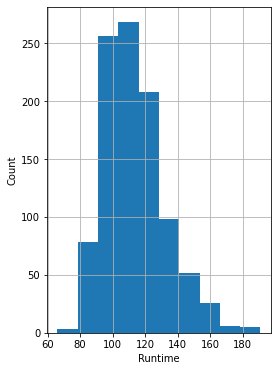

In [4]:
fig1, ax1 = plt.subplots(figsize = (4, 6))
ax1.hist(df['Runtime (Minutes)'])
ax1.grid()
ax1.set_xlabel('Runtime')
ax1.set_ylabel('Count')